# First EDA

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import seaborn as sns
import sklearn.cluster as cluster
import time
from pandas_profiling import ProfileReport

import statsmodels.api as sm
import statsmodels.formula.api as smf

import math

# Specifing figure layout
%matplotlib inline
# plt.style.use('fivethirtyeight')
# sns.set_color_codes('bright')
# plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
# plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
data_raw = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data.csv')

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ZONEID     175440 non-null  int64  
 1   TIMESTAMP  175440 non-null  object 
 2   TARGETVAR  175265 non-null  float64
 3   U10        175440 non-null  float64
 4   V10        175440 non-null  float64
 5   U100       175440 non-null  float64
 6   V100       175440 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.4+ MB


In [4]:
data_raw[data_raw.isna()['TARGETVAR'] == True].head(50)

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
11456,1,20130422 9:00,NaN,3.443181,-3.027788,6.303670,-5.210786
12052,1,20130517 5:00,NaN,2.804199,2.817081,3.925260,4.087397
12196,1,20130523 5:00,NaN,-2.591097,3.290387,-3.751520,4.635865
12693,1,20130612 22:00,NaN,-1.997594,4.385939,-3.797795,7.395673
12694,1,20130612 23:00,NaN,-1.713462,4.409497,-3.246747,7.282171
12844,1,20130619 5:00,NaN,-2.882698,0.880447,-4.038918,1.139640
13367,1,20130711 0:00,NaN,-0.721653,-3.233841,-0.941880,-5.956103
14223,1,20130815 16:00,NaN,-0.151238,-5.951176,-0.109497,-11.251858
15075,1,20130920 4:00,NaN,5.346351,2.417640,7.621993,3.431638
15841,1,20131022 2:00,NaN,-3.742070,1.164535,-5.330432,1.555664


In [5]:
data_raw.isna()#.sum()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
175435,False,False,True,False,False,False,False
175436,False,False,True,False,False,False,False
175437,False,False,True,False,False,False,False
175438,False,False,True,False,False,False,False


In [6]:
data_raw.dropna(axis=0, inplace=True)

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175265 entries, 0 to 175433
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ZONEID     175265 non-null  int64  
 1   TIMESTAMP  175265 non-null  object 
 2   TARGETVAR  175265 non-null  float64
 3   U10        175265 non-null  float64
 4   V10        175265 non-null  float64
 5   U100       175265 non-null  float64
 6   V100       175265 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
data_raw = data_raw.assign(WINDSPEED10=
    np.sqrt(np.power(data_raw['U10'],2) + np.power(data_raw['V10'],2)));
data_raw = data_raw.assign(WINDSPEED100=
    np.sqrt(np.power(data_raw['U100'],2) + np.power(data_raw['V100'],2)));

In [9]:
data_raw["TIMESTAMP"] = pd.to_datetime(data_raw['TIMESTAMP'], 
            format='%Y%m%d %H:%M')

In [10]:
data_raw['date'] = data_raw['TIMESTAMP'].dt.date
data_raw['dayofyear'] = data_raw['TIMESTAMP'].dt.dayofyear
data_raw['day'] = data_raw['TIMESTAMP'].dt.day
data_raw['month'] = data_raw['TIMESTAMP'].dt.month
data_raw['year'] = data_raw['TIMESTAMP'].dt.year
data_raw['hour'] = data_raw['TIMESTAMP'].dt.hour
data_raw['year_month'] = data_raw['TIMESTAMP'].dt.strftime('%Y-%m')


In [11]:
def calc_wind_dir(u, v):
    return np.mod(180 + 180./np.pi*np.arctan2(u, v),360)

In [12]:
data_raw = data_raw.assign(winddir100=lambda x: calc_wind_dir(x['U100'], x['V100']))
data_raw = data_raw.assign(winddir10=lambda x: calc_wind_dir(x['U10'], x['V10']))

In [13]:
data_raw[data_raw.isna()['TARGETVAR'] == True].groupby('ZONEID').count()

,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,WINDSPEED10,WINDSPEED100,date,dayofyear,day,month,year,hour,year_month,winddir100,winddir10
ZONEID,,,,,,,,,,,,,,,,,


In [14]:
# data_raw['WINDDIR10'] = data_raw[['U10', 'V10']]

In [15]:
data_zone = []
for zone in range(1,11):
    data_zone.append(data_raw[data_raw["ZONEID"] == zone])

In [16]:
#sns.pairplot(data_zone[0])

In [17]:
for zone in data_zone:
    print('Number of entries:',zone.shape)

Number of entries: (17526, 18)
Number of entries: (17523, 18)
Number of entries: (17450, 18)
Number of entries: (17538, 18)
Number of entries: (17538, 18)
Number of entries: (17538, 18)
Number of entries: (17538, 18)
Number of entries: (17538, 18)
Number of entries: (17538, 18)
Number of entries: (17538, 18)


In [18]:
data_raw.corr()

,ZONEID,TARGETVAR,U10,V10,U100,V100,WINDSPEED10,WINDSPEED100,dayofyear,day,month,year,hour,winddir100,winddir10
ZONEID,1.000000,0.028176,-0.022497,0.005992,-0.019609,0.005358,0.014747,0.011673,0.000303,-0.000005,0.000308,0.000650,-0.000224,-0.020832,-0.027346
TARGETVAR,0.028176,1.000000,0.260371,-0.112407,0.252091,-0.125996,0.710821,0.764101,0.049064,-0.021194,0.051180,0.015372,0.043657,0.120678,0.121336
U10,-0.022497,0.260371,1.000000,-0.004402,0.982410,0.023483,0.452331,0.385758,0.151841,0.011357,0.151966,0.004594,-0.161911,0.667728,0.680266
V10,0.005992,-0.112407,-0.004402,1.000000,-0.045224,0.981533,-0.065079,-0.166358,-0.060057,-0.004213,-0.061237,-0.049522,-0.041307,-0.088910,-0.046767
U100,-0.019609,0.252091,0.982410,-0.045224,1.000000,-0.018397,0.419068,0.367329,0.156737,0.012055,0.156930,0.007836,-0.130669,0.696190,0.696985
V100,0.005358,-0.125996,0.023483,0.981533,-0.018397,1.000000,-0.078882,-0.185646,-0.059015,-0.003368,-0.060224,-0.054412,-0.044603,-0.050888,-0.003768
WINDSPEED10,0.014747,0.710821,0.452331,-0.065079,0.419068,-0.078882,1.000000,0.916353,0.069695,-0.012822,0.071000,0.012704,-0.190631,0.201663,0.211425
WINDSPEED100,0.011673,0.764101,0.385758,-0.166358,0.367329,-0.185646,0.916353,1.000000,0.084270,-0.018126,0.086373,0.022426,0.014976,0.163334,0.167568
dayofyear,0.000303,0.049064,0.151841,-0.060057,0.156737,-0.059015,0.069695,0.084270,1.000000,0.091619,0.996503,-0.003283,-0.000773,0.106318,0.099619
day,-0.000005,-0.021194,0.011357,-0.004213,0.012055,-0.003368,-0.012822,-0.018126,0.091619,1.000000,0.008377,-0.002636,-0.000883,0.008531,0.004344


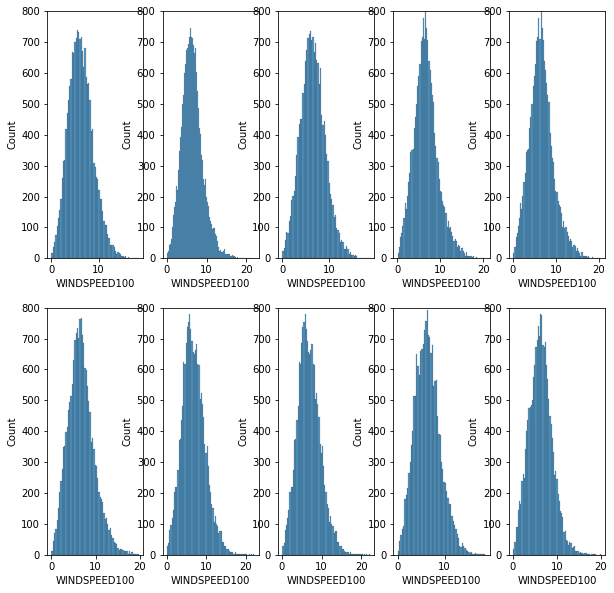

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.histplot(x='WINDSPEED100', data=data_zone[i-1])
    plt.ylim(0,800)

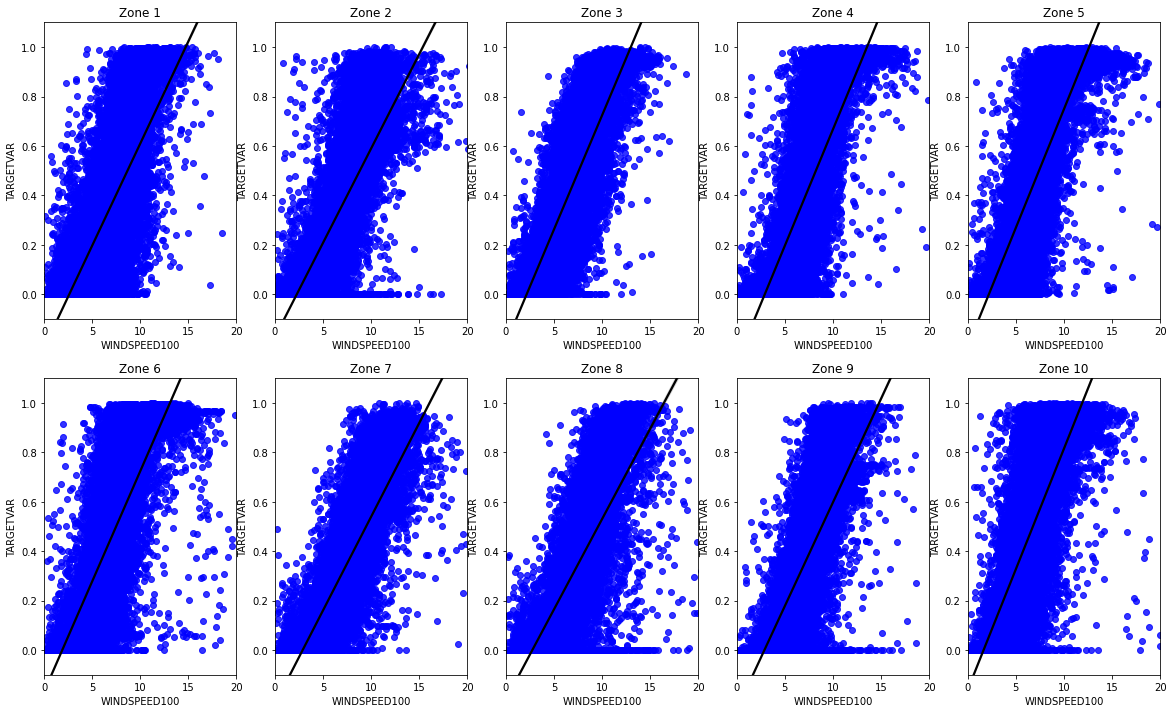

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.regplot(x='WINDSPEED100', y='TARGETVAR', data=data_zone[i-1], 
             scatter_kws={"color": "blue"}, line_kws={"color": "black"})
    plt.xlim(0,20)
    plt.ylim(-0.1,1.1)
    plt.title('Zone '+str(i))

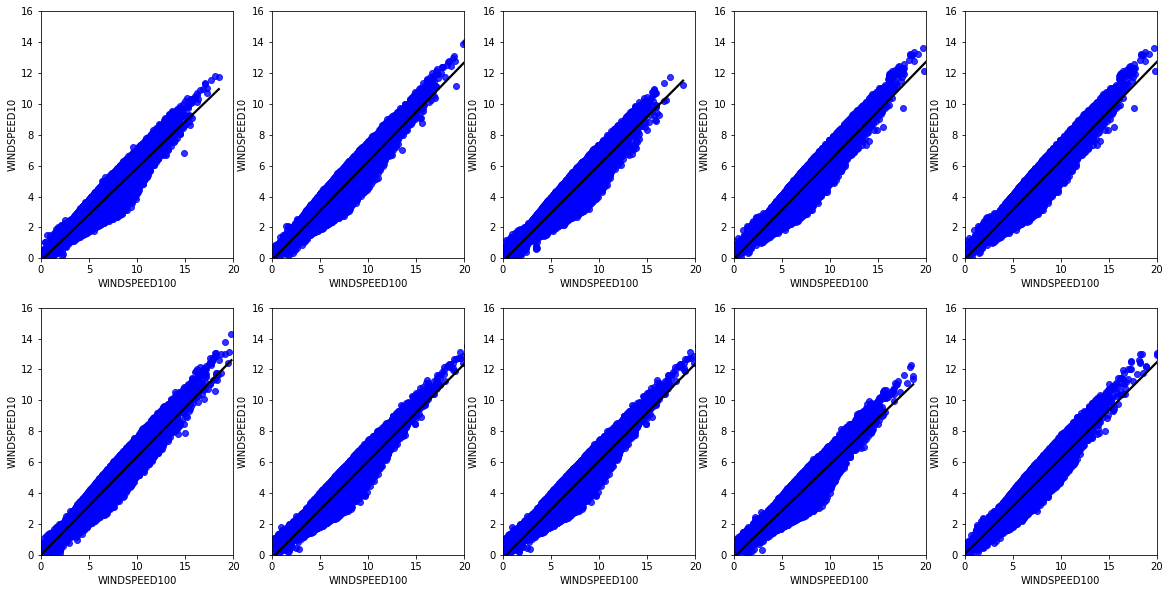

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.regplot(x='WINDSPEED100', y='WINDSPEED10', data=data_zone[i-1], 
             scatter_kws={"color": "blue"}, line_kws={"color": "black"})
    plt.xlim(0,20)
    plt.ylim(0,16)

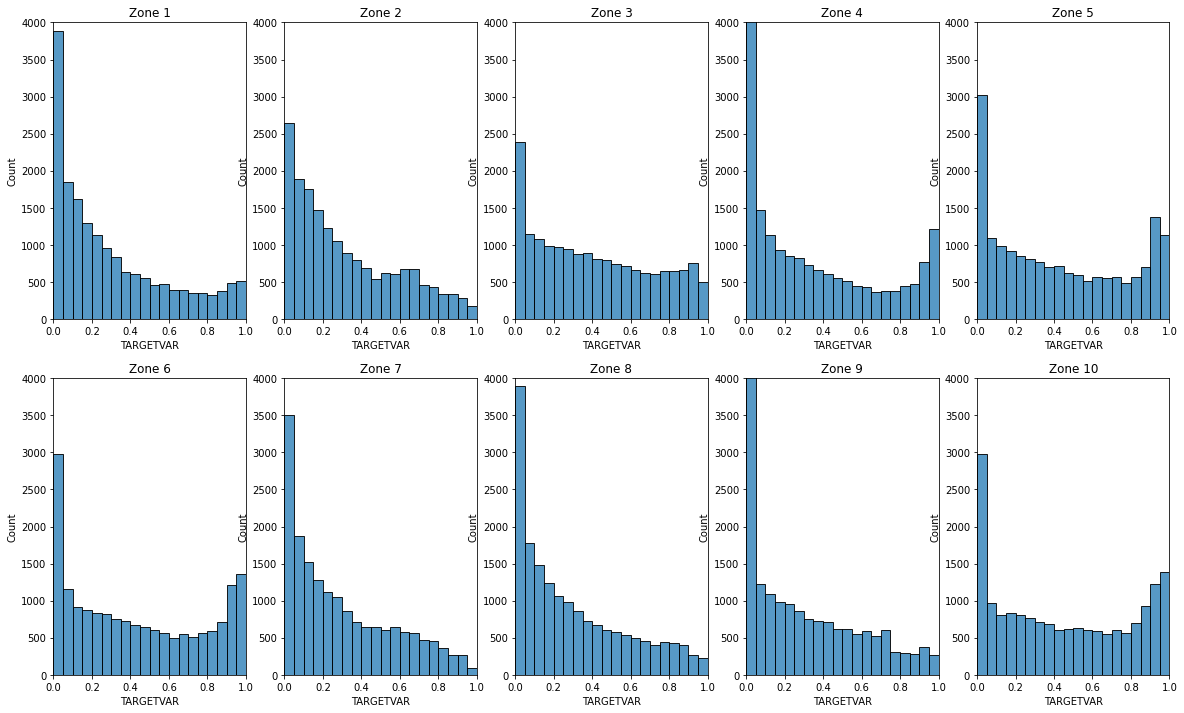

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.histplot(x='TARGETVAR', data=data_zone[i-1], bins=20)
    plt.title('Zone '+str(i))
    # sns.regplot(x='WINDSPEED100', y='WINDSPEED10', data=data_zone[i-1], 
    #          scatter_kws={"color": "blue"}, line_kws={"color": "black"})
    plt.xlim(0,1)
    plt.ylim(0,4000)

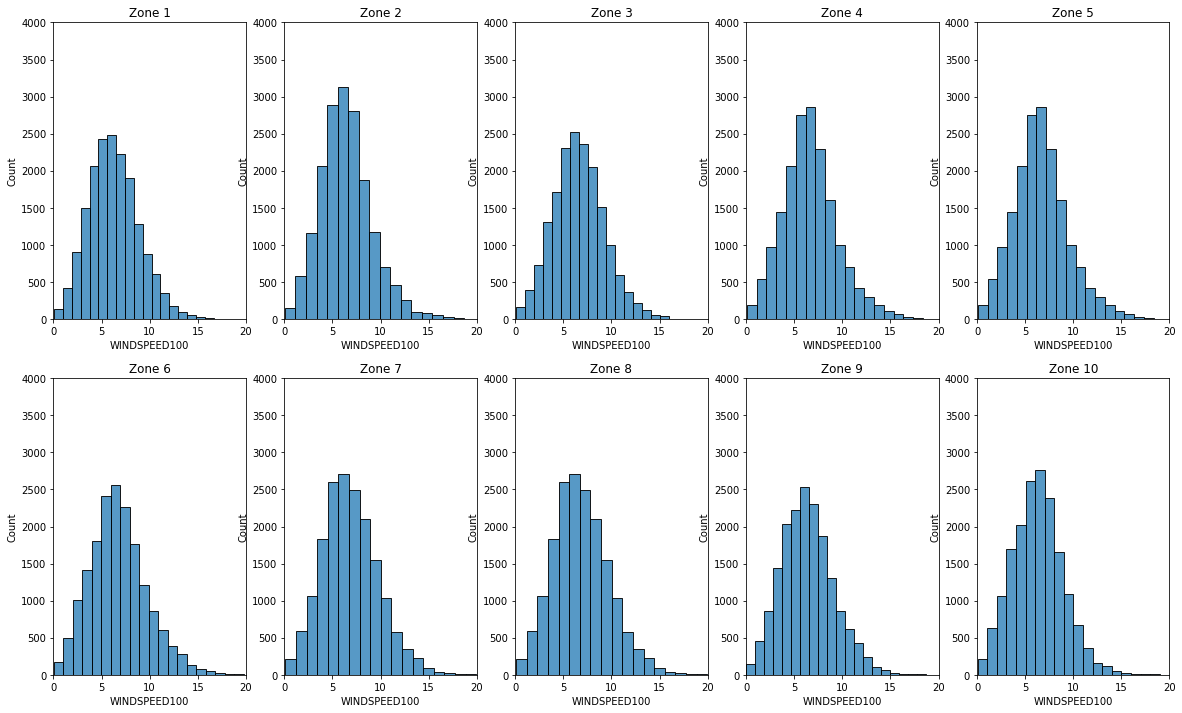

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
for i in range(1,11):
    plt.subplot(2, 5, i)
    sns.histplot(x='WINDSPEED100', data=data_zone[i-1], bins=20)
    plt.title('Zone '+str(i))
    plt.xlim(0,20)
    plt.ylim(0,4000)

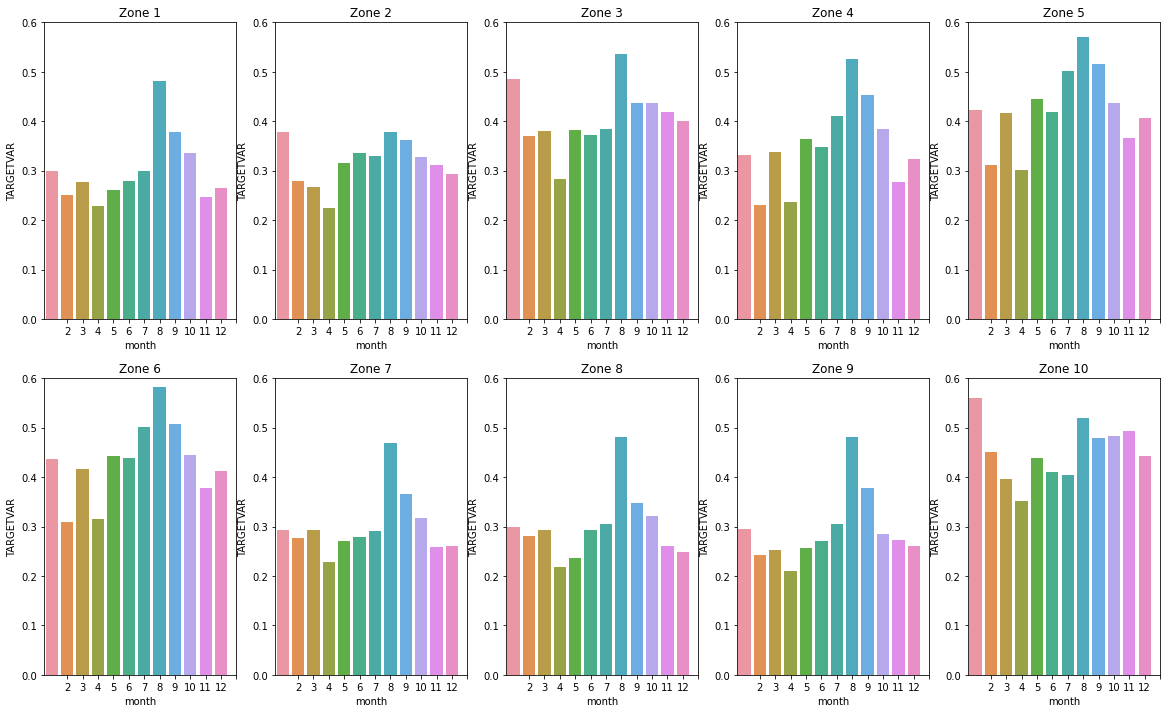

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12), sharey=True)
for i in range(1,11):
    plt.subplot(2, 5, i)
    df_tmp = data_zone[i-1]
    df_tmp = df_tmp.groupby('month').mean().reset_index()
    sns.barplot(x='month', y='TARGETVAR', data=df_tmp)
    plt.title('Zone '+str(i))
    plt.xticks(range(1,13))
    #plt.xlim(0,20)
    plt.ylim(0,0.6)

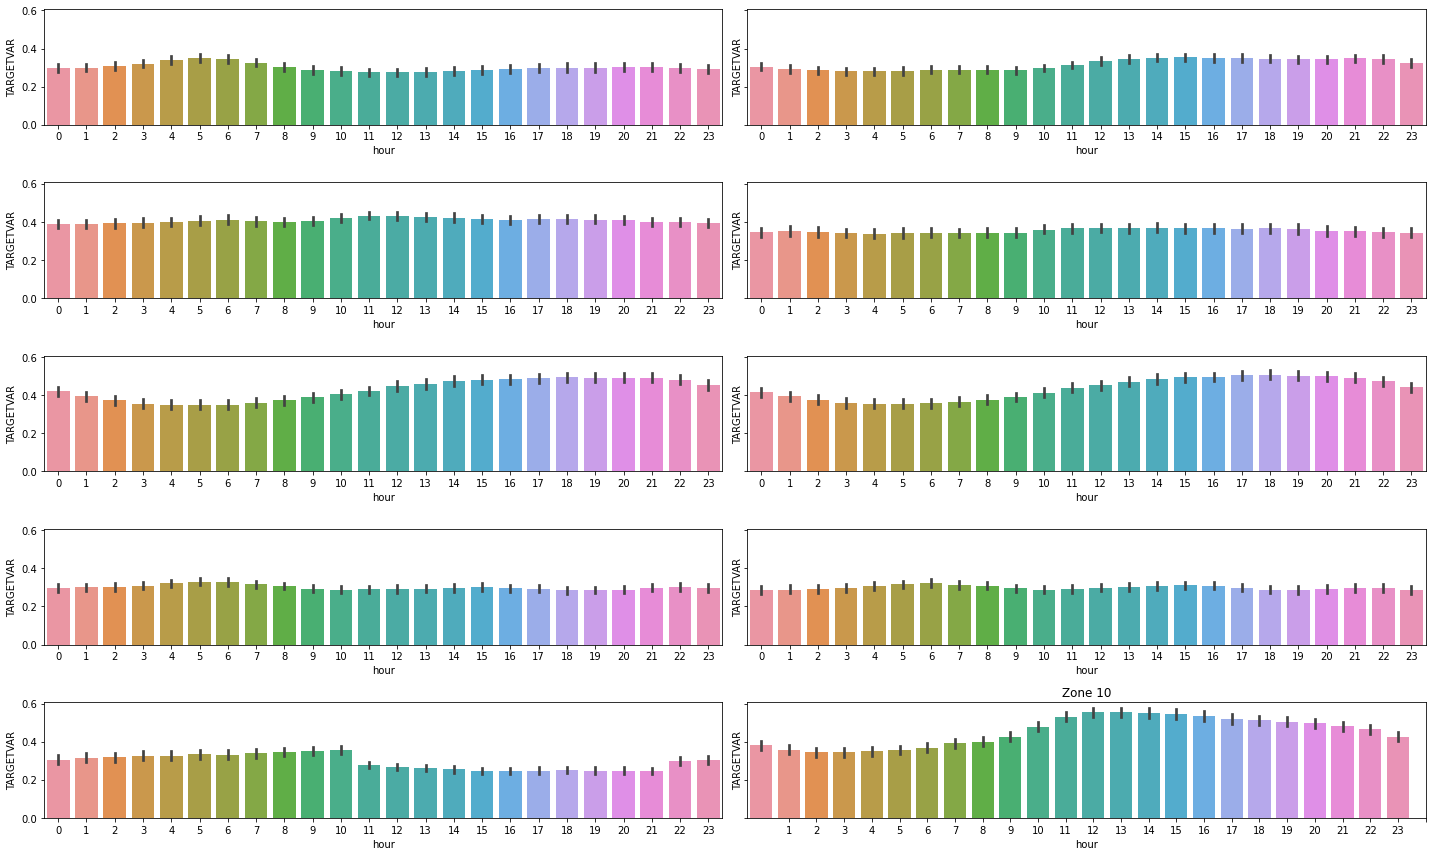

In [25]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,12), sharey=True)
ax = ax.ravel()
for i in range(1,11):
    #plt.subplot(2, 5, i)
    df_tmp = data_zone[i-1]
    #df_tmp = df_tmp.groupby('hour').mean().reset_index()
    sns.barplot(x='hour', y='TARGETVAR', data=df_tmp, ax=ax[i-1])
    plt.title('Zone '+str(i))
    plt.xticks(range(1,25))
    #plt.xlim(0,20)
    #plt.ylim(0,1)
fig.tight_layout()

## Where are the phases with low power output?

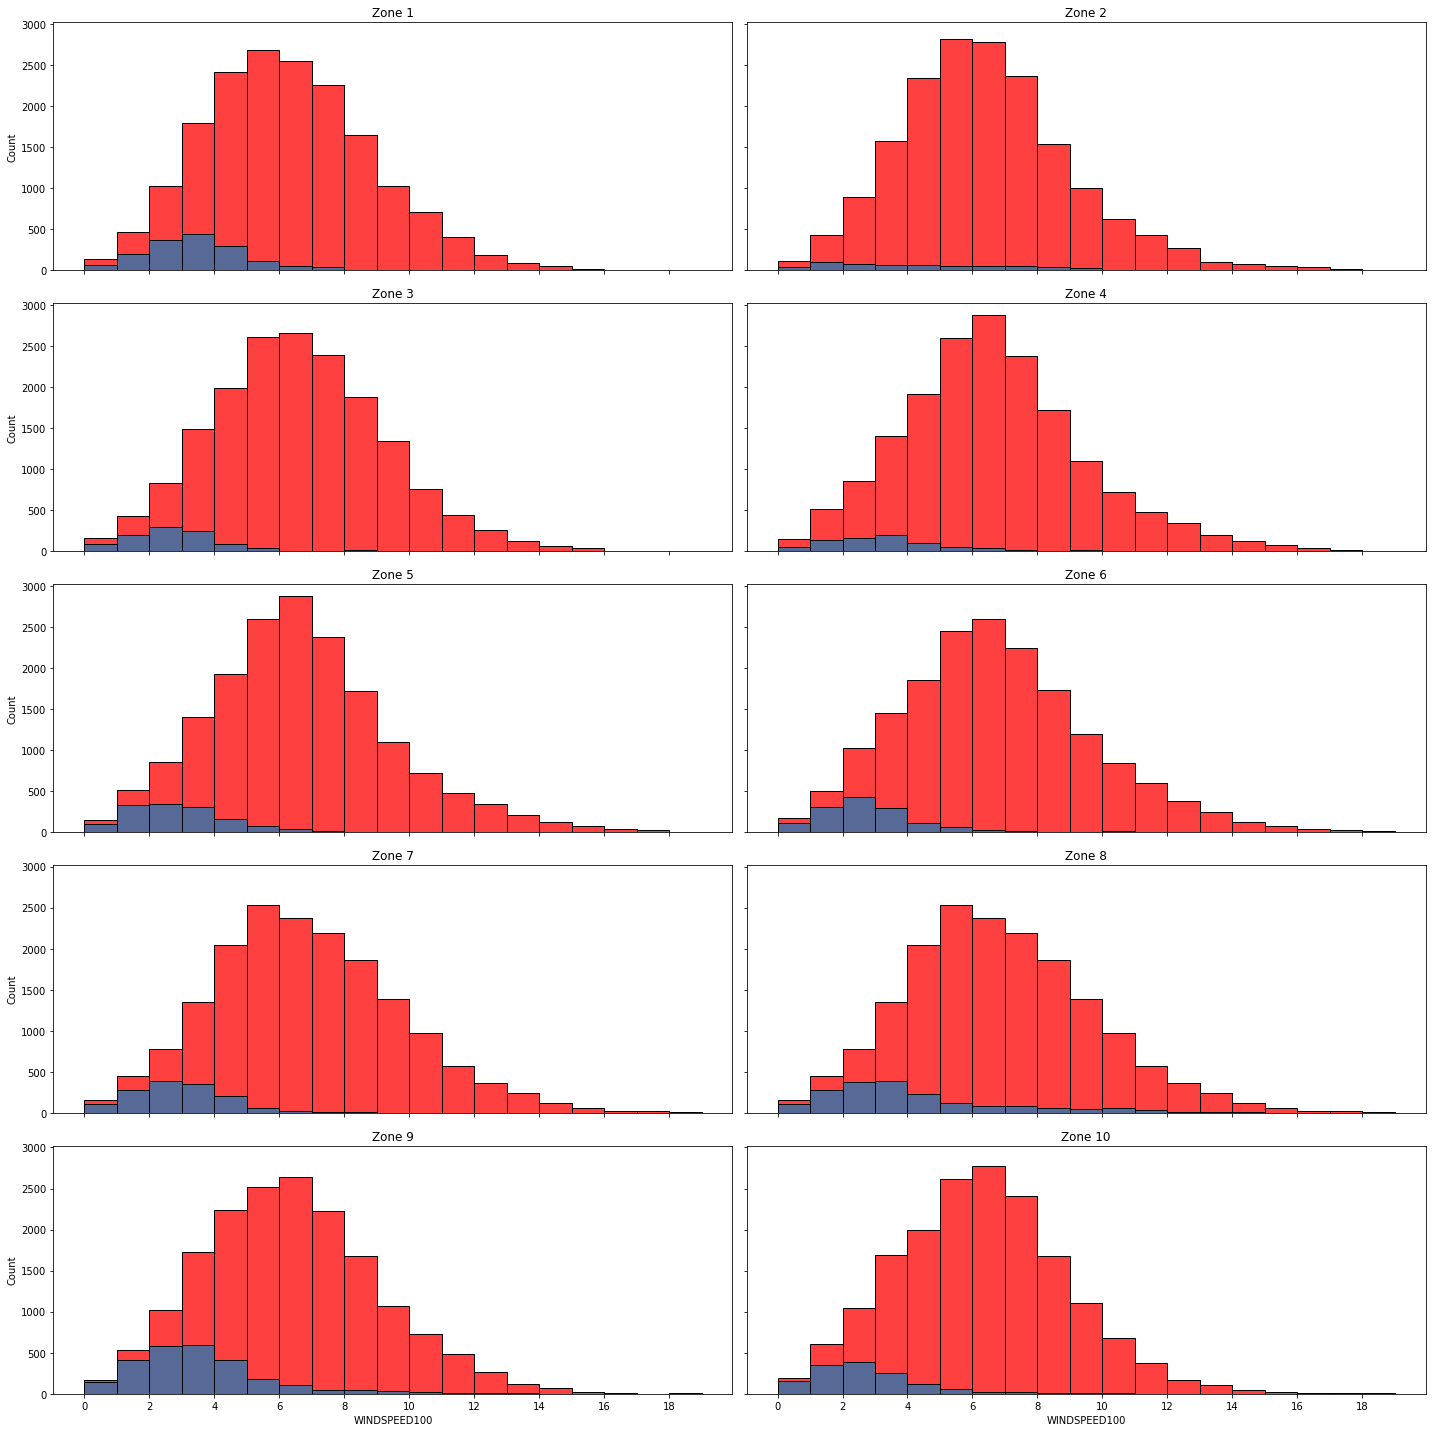

In [26]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,20), sharex=True, sharey=True)
axs = axs.ravel()
for ii in range(0,10):
    ax = axs[ii]
    df1 = data_zone[ii]
    df1_zeros = df1[df1['TARGETVAR'] == 0]
    sns.histplot(data_zone[ii], x='WINDSPEED100', color='red', ax=ax, bins=range(0,20,1));
    sns.histplot(df1_zeros, x='WINDSPEED100', ax=ax, bins=range(0,20,1));
    ax.set_xticks(range(0,20,2));
    ax.set_title('Zone '+str(ii+1))
plt.tight_layout()

<AxesSubplot:xlabel='date', ylabel='TIMESTAMP'>

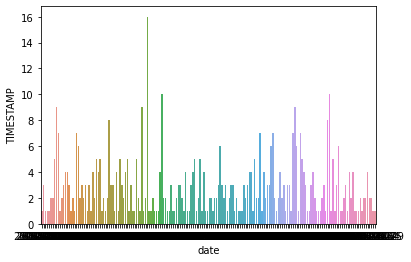

In [27]:
df1z = data_zone[0]
df1z = df1z[(df1z['WINDSPEED100'] > 4) & (df1z['TARGETVAR'] == 0)]
df1z = df1z.groupby('date').count().reset_index()
sns.barplot(data=df1z, x='date', y='TIMESTAMP')
#df1z.head(20)

In [28]:
df1 = data_zone[0]
df1 = df1[df1['date'] < pd.to_datetime('2013-01-01')]
df1_zeros = df1[df1['TARGETVAR'] == 0]
df1_zeros_g = df1_zeros.groupby(['ZONEID','month']).count().reset_index()[['month', 'TIMESTAMP']]
df1_zeros_g.columns = ['month', 'number_with_zero_output']

In [29]:
df1_zeros_g

,month,number_with_zero_output
0,1,19
1,2,46
2,3,103
3,4,59
4,5,94
5,6,93
6,7,132
7,8,41
8,9,90
9,10,75


<AxesSubplot:xlabel='month', ylabel='number_with_zero_output'>

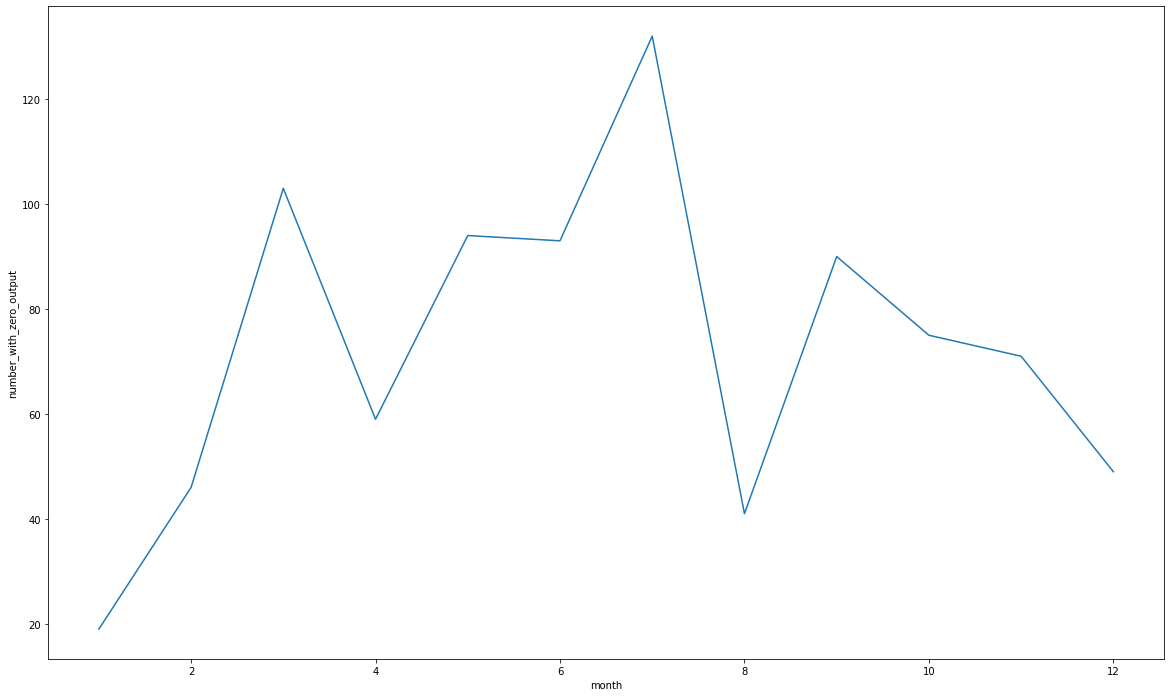

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,12), sharey=True)
sns.lineplot(x='month', y='number_with_zero_output', data=df1_zeros_g, ax=ax)

<AxesSubplot:xlabel='date', ylabel='TARGETVAR'>

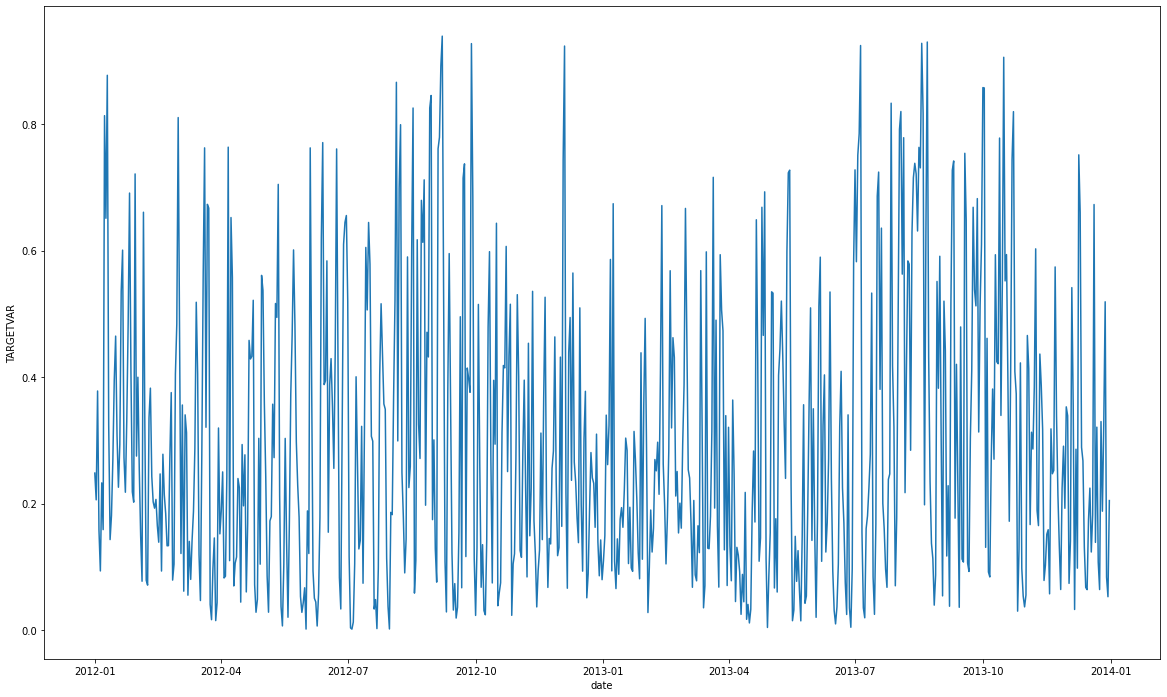

In [31]:
df1 = data_zone[0]
df1 = df1.groupby('date').mean().reset_index()
df1
df_tmp = df1[(df1['date'] < pd.to_datetime('2012-08-01')) | (df1['date'] > pd.to_datetime('2012-04-01'))]#.head(30)
df_tmp
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,12), sharey=True)
sns.lineplot(x='date', y='TARGETVAR', data=df_tmp, ax=ax)

In [32]:
df_long = []
for ii in range(0,10):
    cc = 0
    print('Long downtimes with wind in zone ',ii+1)
    df1 = data_zone[ii].copy()
    df1['long_zero'] = 0
    begin = False
    l1, l2, l3, l4 = False, False, False, False
    for index, row in df1.iterrows():
        l4, l3, l2 = l3, l2, l1
        l1 = (row['TARGETVAR'] == 0) and (row['WINDSPEED100'] > 5)
        if l1 and l2 and l3:
            df1.at[index, 'long_zero'] =  1
            df1.at[index-1, 'long_zero'] =  1
            df1.at[index-2, 'long_zero'] =  1
            if not begin:
                print(df1.at[index-2, 'TIMESTAMP'])
                cc +=1
                begin = True
        else:
            begin = False    
    df_long.append(df1)
    print('Number of long downtimes with wind in zone ',ii+1,':',cc)
    print('---'*15)

Long downtimes with wind in zone  1
2012-03-29 18:00:00
2012-04-23 10:00:00
2012-06-11 08:00:00
2012-06-20 14:00:00
2012-07-10 01:00:00
2012-08-09 08:00:00
2012-09-03 12:00:00
2012-11-08 01:00:00
2012-12-14 06:00:00
2013-01-25 12:00:00
2013-01-25 20:00:00
2013-02-23 11:00:00
2013-04-12 08:00:00
2013-04-20 09:00:00
2013-05-06 13:00:00
2013-05-09 23:00:00
2013-06-10 16:00:00
2013-07-21 20:00:00
2013-08-26 23:00:00
2013-08-28 05:00:00
2013-09-20 00:00:00
2013-09-21 09:00:00
2013-10-19 10:00:00
2013-11-01 11:00:00
2013-12-07 10:00:00
Number of long downtimes with wind in zone  1 : 25
---------------------------------------------
Long downtimes with wind in zone  2
2012-02-15 08:00:00
2012-02-16 05:00:00
2012-03-14 05:00:00
2012-11-04 09:00:00
2013-02-26 16:00:00
2013-10-21 23:00:00
2013-10-25 06:00:00
2013-10-26 07:00:00
2013-10-27 00:00:00
2013-11-02 19:00:00
2013-11-04 05:00:00
Number of long downtimes with wind in zone  2 : 11
---------------------------------------------
Long downtimes

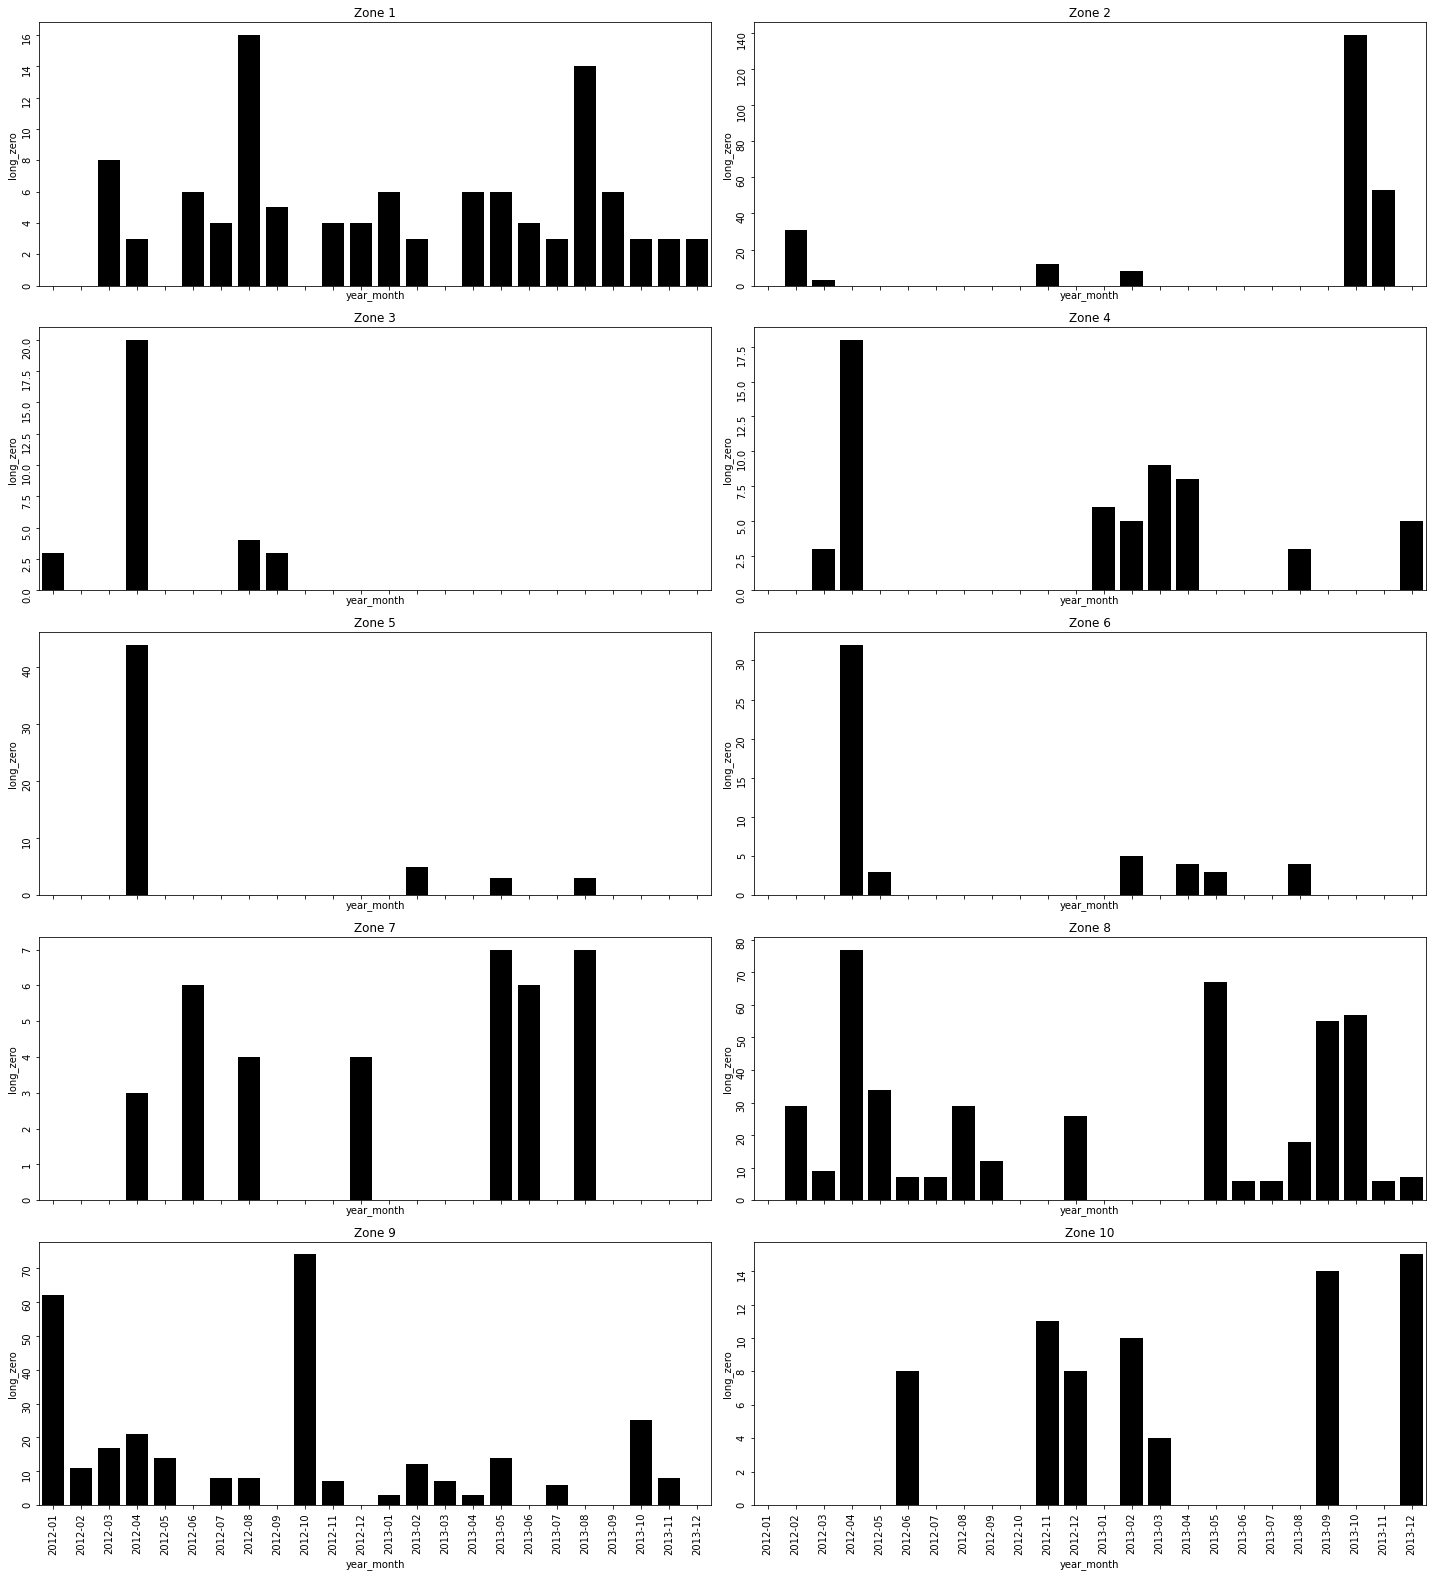

In [33]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,22), sharex=True)#, sharey=True)
axs = axs.ravel()
cc = 0
for zone,ax in zip(df_long, axs):
    #print(cc)
    df_tmp = []
    df_tmp = zone.copy()
    df_tmp = df_tmp.groupby('year_month').sum().reset_index().copy()
    cc += 1
    sns.barplot(x='year_month', y='long_zero', data=df_tmp, ax=ax, color='black')
    ax.set_title('Zone '+str(cc))
    ax.tick_params(labelrotation=90)
plt.tight_layout()

In [34]:
data_raw

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,WINDSPEED10,WINDSPEED100,date,dayofyear,day,month,year,hour,year_month,winddir100,winddir10
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,2012-01-01,1,1,1,2012,1,2012-01,321.999735,321.614439
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,2012-01-01,1,1,1,2012,2,2012-01,306.385781,305.473680
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,2012-01-01,1,1,1,2012,3,2012-01,289.088098,287.108562
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,2012-01-01,1,1,1,2012,4,2012-01,276.310236,273.345160
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,2012-01-01,1,1,1,2012,5,2012-01,263.581938,260.159324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175429,10,2013-12-31 14:00:00,0.813845,-4.536092,-3.953468,-7.270275,-8.860726,6.017145,11.461648,2013-12-31,365,31,12,2013,14,2013-12,39.369070,48.925958
175430,10,2013-12-31 15:00:00,0.814521,-3.483908,-5.124576,-5.788414,-10.169916,6.196684,11.701834,2013-12-31,365,31,12,2013,15,2013-12,29.647245,34.209554
175431,10,2013-12-31 16:00:00,0.821406,-2.344393,-5.535194,-3.856273,-10.789695,6.011202,11.458114,2013-12-31,365,31,12,2013,16,2013-12,19.667057,22.954753
175432,10,2013-12-31 17:00:00,0.810340,-1.490814,-5.479158,-2.409474,-10.703127,5.678353,10.970984,2013-12-31,365,31,12,2013,17,2013-12,12.686854,15.221031


## Wind direction

Binning the wind direction into 12 bins.

In [35]:
def flatten(l):
    new = []
    for sub in l:
        if isinstance(sub, list):
            for sub2 in flatten(sub):
                new.append(sub2)
        else:
            new.append(sub)
    return new

ll = ['N', ['E']*2, [['S']]*2, ['W']*2, 'N']
flatten(ll)

['N', 'E', 'E', 'S', 'S', 'W', 'W', 'N']

In [36]:
if 'winddir_bin' in data_raw.columns:
    data_raw.drop(['winddir_bin'], axis=1, inplace=True)
# N, E, S, W
wind_bins = np.arange(0, 360+1, 45)
wind_bin_labels = flatten(['N', ['E']*2, ['S']*2, ['W']*2, 'N'])
# 12 wind bins
wind_bins = np.arange(0, 360+1, 30)
wind_bin_labels = range(1,13)
wind_bins_series = pd.cut(data_raw['winddir100'], bins=wind_bins, labels=wind_bin_labels, ordered=False)
wind_bins_series.name = 'winddir_bin'
data_raw = data_raw.join(wind_bins_series, lsuffix='_l', rsuffix='_r')
data_zone = []
for zone in range(1,11):
    data_zone.append(data_raw[data_raw["ZONEID"] == zone])

Now look for all zones if the relation between targetvar and windspeed is the same for every wind direction.

0 [[1.         0.72496881]
 [0.72496881 1.        ]]
1 [[1.         0.70131222]
 [0.70131222 1.        ]]
2 [[1.         0.69720981]
 [0.69720981 1.        ]]
3 [[1.         0.65872817]
 [0.65872817 1.        ]]
4 [[1.         0.67456496]
 [0.67456496 1.        ]]
5 [[1.         0.74925908]
 [0.74925908 1.        ]]
6 [[1.         0.77022547]
 [0.77022547 1.        ]]
7 [[1.         0.78964248]
 [0.78964248 1.        ]]
8 [[1.        0.7724446]
 [0.7724446 1.       ]]
9 [[1.         0.72558612]
 [0.72558612 1.        ]]
10 [[1.         0.71383409]
 [0.71383409 1.        ]]
11 [[1.         0.71632755]
 [0.71632755 1.        ]]


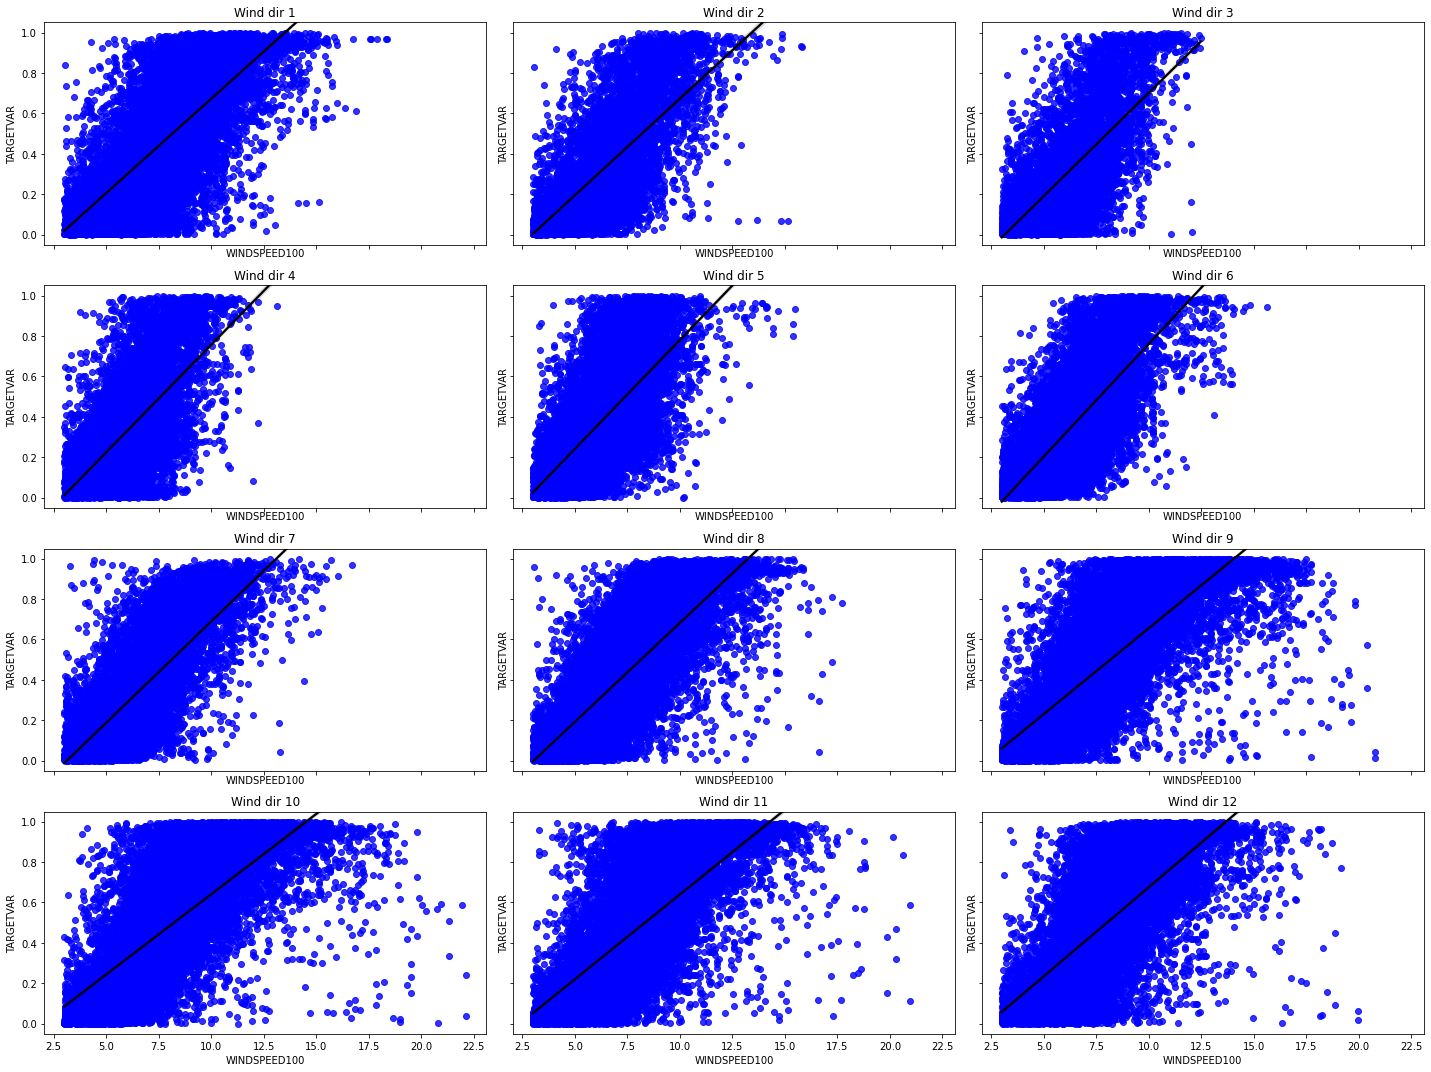

In [37]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15), sharex=True, sharey=True)
axs = axs.ravel()
df1 = data_raw.copy()
df1 = df1[(df1['TARGETVAR'] > 0) & (df1['TARGETVAR'] < 1) & (df1['WINDSPEED100']>3)]
for idx,tt in enumerate(zip(sorted(df1['winddir_bin'].unique()), axs)):
    bin,ax = tt
    sns.regplot(x='WINDSPEED100', y='TARGETVAR', data=df1[df1['winddir_bin']==bin], 
             scatter_kws={"color": "blue"}, line_kws={"color": "black"}, ax=ax)
    X = df1[df1['winddir_bin']==bin]['WINDSPEED100'].copy()
    X = sm.add_constant(X)
    res = sm.OLS(df1[df1['winddir_bin']==bin]['TARGETVAR'], X).fit().params
    print(idx, np.corrcoef([df1[df1['winddir_bin']==bin]['TARGETVAR'], df1[df1['winddir_bin']==bin]['WINDSPEED100']]))
    ax.set_title('Wind dir '+str(bin)) #+'\n'+str(round(res[0],2))+', '+str(round(res[1],2)))
plt.ylim(-0.05, 1.05)
plt.tight_layout()

For one zone

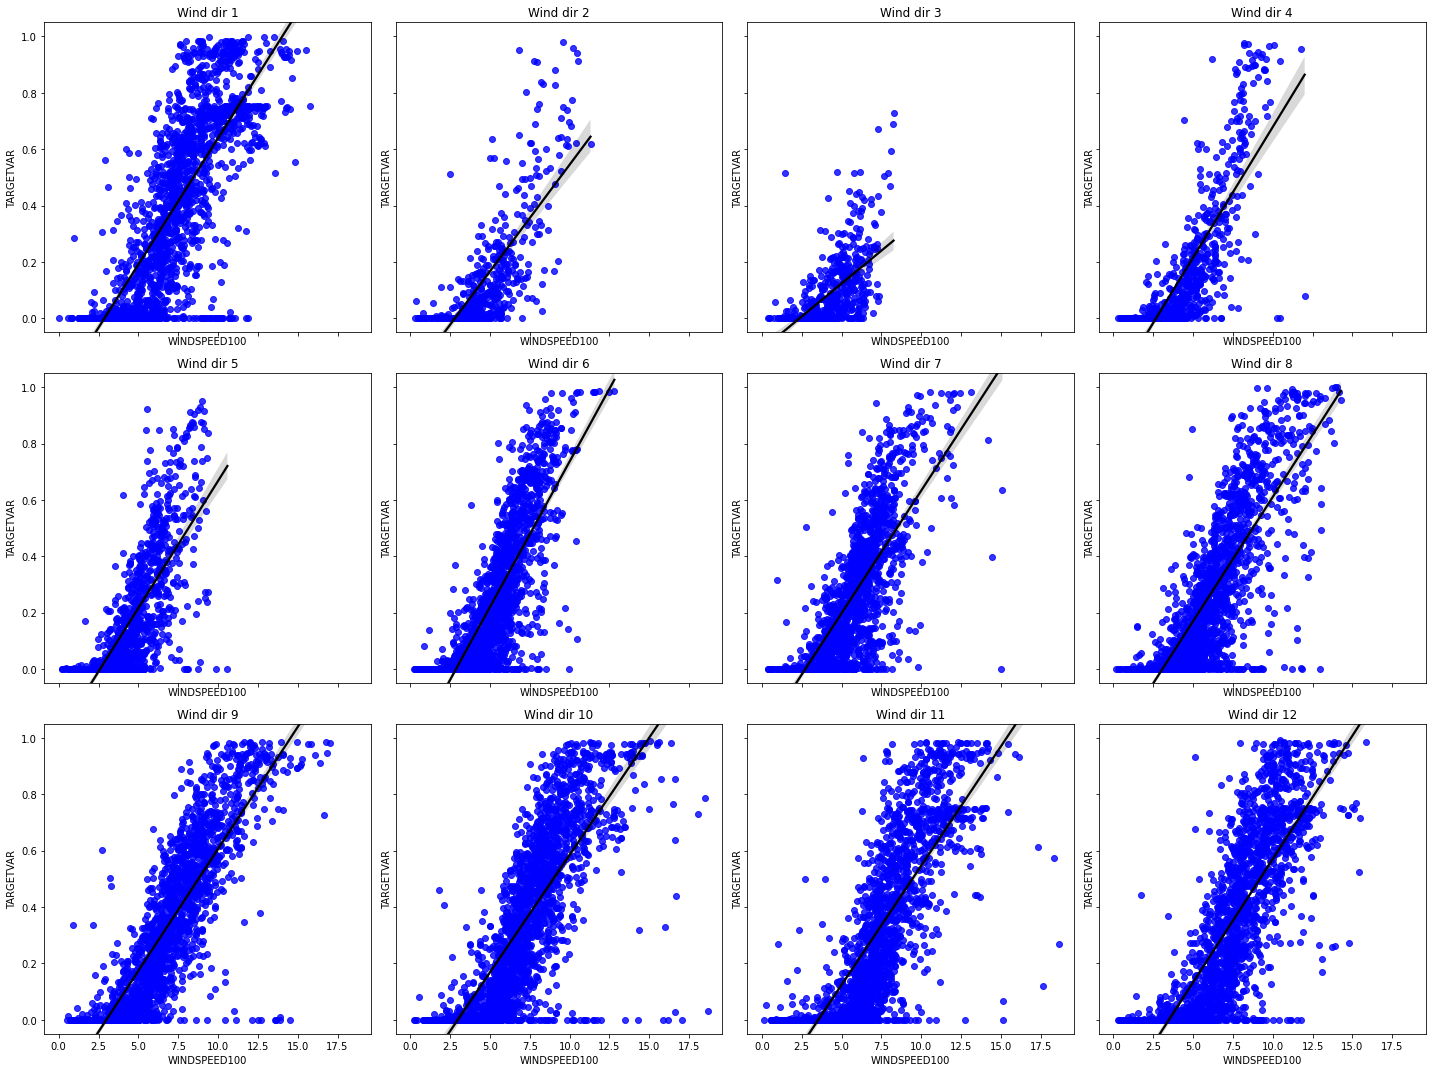

In [38]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,15), sharex=True, sharey=True)
axs = axs.ravel()
df1 = data_zone[8].copy()
#df1 = df1[(df1['TARGETVAR'] > 0) & (df1['TARGETVAR'] < 1) & (df1['WINDSPEED100']>3)]
for idx,tt in enumerate(zip(sorted(df1['winddir_bin'].unique()), axs)):
    bin,ax = tt
    sns.regplot(x='WINDSPEED100', y='TARGETVAR', data=df1[df1['winddir_bin']==bin], 
             scatter_kws={"color": "blue"}, line_kws={"color": "black"}, ax=ax)
    ax.set_title('Wind dir '+str(bin))
plt.ylim(-0.05, 1.05)
plt.tight_layout()

## How big is the spread of target - windspeed at different hours of the day

In [39]:
df1 = data_zone[0].copy()
df1 = df1[(df1['TARGETVAR'] > 0) & (df1['TARGETVAR'] < 1) & (df1['WINDSPEED100']>3)]
#df1 = df1[df1['winddir_bin']=='W']
df1.hour.unique()
df1.winddir_bin

1         11
2         10
3         10
7          6
8          6
          ..
168733     1
168734     1
168735     1
168736     1
168737    12
Name: winddir_bin, Length: 14909, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

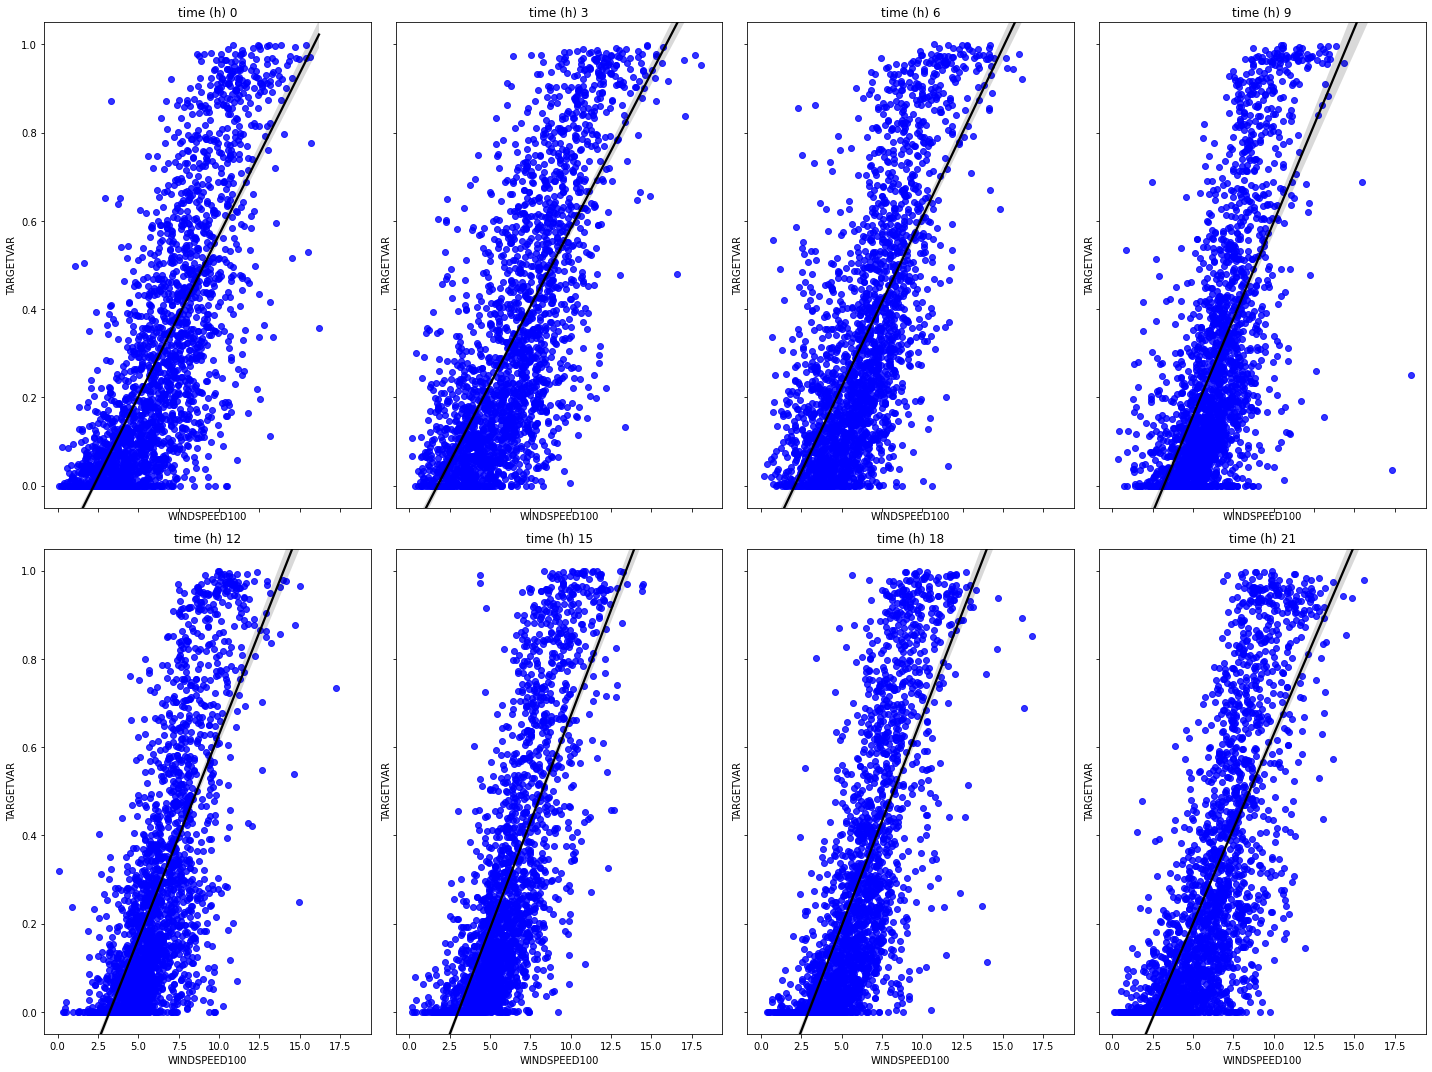

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,15), sharex=True, sharey=True)
axs = axs.ravel()
df1 = data_zone[0].copy()
#df1 = df1[(df1['TARGETVAR'] > 0) & (df1['TARGETVAR'] < 1) & (df1['WINDSPEED100']>3)]
#df1 = df1[df1['winddir_bin']=='W']
for idx,tt in enumerate(zip(range(0,24,3), axs)):
    hh,ax = tt
    sns.regplot(x='WINDSPEED100', y='TARGETVAR', data=df1[(df1['hour']>=hh) & (df1['hour']<hh+3)], 
             scatter_kws={"color": "blue"}, line_kws={"color": "black"}, ax=ax)
    ax.set_title('time (h) '+str(hh))
plt.ylim(-0.05, 1.05)
plt.tight_layout()


## Binning the windspeed100

In [41]:
if 'windspeed100_bin' in data_raw.columns:
    data_raw.drop(['windspeed100_bin'], axis=1, inplace=True)

# wind speed bins
windspeed100_bins = np.arange(0, 360+1, 30)
windspeed100_bin_labels = range(0,20,2)
wind_bins_series = pd.cut(data_raw['winddir100'], bins=wind_bins, labels=wind_bin_labels, ordered=False)
wind_bins_series.name = 'winddir_bin'
data_raw = data_raw.join(wind_bins_series, lsuffix='_l', rsuffix='_r')
data_zone = []
for zone in range(1,11):
    data_zone.append(data_raw[data_raw["ZONEID"] == zone])

In [42]:
df_drop_zeroes = data_raw[data_raw.TARGETVAR !=0]
x = np.array(df_drop_zeroes['WINDSPEED100'])
y = np.array(df_drop_zeroes['TARGETVAR'])

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

x0 = 7.287221585383607
y0 = 0.03224130191341919
c = 0.8194488020386708
k = 0.6710037549990788



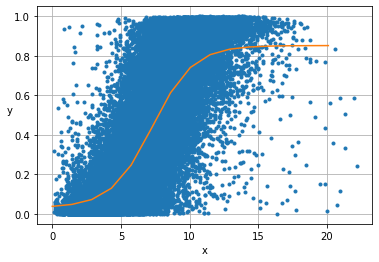

In [44]:
# source: https://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

def resize(arr,lower=0.0,upper=1.0):
    arr=arr.copy()
    if lower>upper: lower,upper=upper,lower
    arr -= arr.min()
    arr *= (upper-lower)/arr.max()
    arr += lower
    return arr

# raw data
# x = np.array([821,576,473,377,326],dtype='float')
# y = np.array([255,235,208,166,157],dtype='float')

# x=resize(-x,lower=0.3)
# y=resize(y,lower=0.3)
# print(x_train)
# print(y_train)
p_guess=(np.median(x_train),np.median(y_train),1.0,1.0)
# p_guess=(1,1,1,1)
p, cov, infodict, mesg, ier = scipy.optimize.leastsq(
    residuals,p_guess,args=(x_train,y_train),full_output=1)  

x0,y0,c,k=p
print('''\
x0 = {x0}
y0 = {y0}
c = {c}
k = {k}
'''.format(x0=x0,y0=y0,c=c,k=k))

xp = np.linspace(0, 20.1, 15)
pxp=sigmoid(p,xp)

# Plot the results
plt.plot(x_test, y_test, '.', xp, pxp, '-')
plt.xlabel('x')
plt.ylabel('y',rotation='horizontal') 
plt.grid(True)
plt.show()

In [45]:
def rmse(p,x,y):
    return np.sqrt(np.mean(np.power(y - sigmoid(p,x),2)))

In [46]:
rmse(p,x_test,y_test)

0.190057711180167

In [47]:
coefficients = np.polyfit(x, y, 0)

fitted_data = np.polyval(coefficients, x)


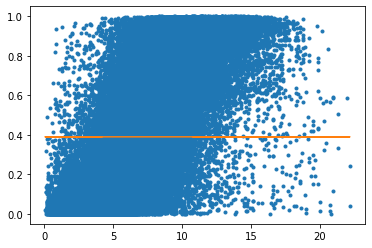

In [48]:
xp = np.linspace(0, 20.1, 150)
pxp = np.polyval(coefficients, x)



# Plot the results
plt.plot(x, y, '.', x, pxp, '-')
#plt.plot(xp, pxp)
# plt.xlabel('x')
# plt.ylabel('y',rotation='horizontal') 
# plt.grid(True)
#plt.show()

In [49]:
np.sqrt(np.mean(np.power(y-pxp,2)))

0.30385380643229387

In [50]:
y.std()

0.3038538064322938